In [10]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [11]:
#chipotle_data.info()
print(chipotle_data.columns.tolist())


['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [17]:
#highest = chipotle_data.idxmax()
#print(chipotle_data.max(axis = 'columns'))


max_quantity = chipotle_data['quantity'].max()
print(f"Max quantity: {max_quantity}")

highest_name = chipotle_data.loc[max_quantity, 'item_name']
print(highest_name)


Max quantity: 15
Chips and Tomatillo-Green Chili Salsa


In [18]:
totalRevenues = 0.0
for index, row in chipotle_data.iterrows():
    totalRevenues += (float(row['item_price'].strip('$')) * float(row['quantity']))

print(f"${round(totalRevenues, 2)}")

$39237.02


In [19]:
totalAmount = 0
for index, row in chipotle_data.iterrows():
    totalAmount += (row['quantity'])

print(totalAmount)

4972


In [20]:
overTen = 0
for index, row in chipotle_data.iterrows():
    if(float(row['item_price'].strip('$')) > 10):
        overTen += 1
    
print(overTen)

1130


In [21]:
uniqueNames = set(chipotle_data['item_name'])
print(uniqueNames)

{'Chips', 'Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Crispy Tacos', 'Chips and Roasted Chili-Corn Salsa', 'Steak Soft Tacos', 'Carnitas Crispy Tacos', 'Side of Chips', 'Chips and Tomatillo-Red Chili Salsa', 'Chicken Salad Bowl', 'Chips and Guacamole', 'Bottled Water', 'Veggie Crispy Tacos', 'Veggie Bowl', 'Salad', 'Veggie Salad', 'Veggie Salad Bowl', 'Veggie Soft Tacos', 'Nantucket Nectar', 'Barbacoa Soft Tacos', 'Veggie Burrito', 'Barbacoa Burrito', 'Steak Burrito', 'Steak Salad Bowl', 'Steak Salad', 'Carnitas Salad Bowl', 'Steak Bowl', 'Canned Soda', 'Barbacoa Salad Bowl', 'Barbacoa Crispy Tacos', '6 Pack Soft Drink', 'Chicken Soft Tacos', 'Carnitas Soft Tacos', 'Burrito', 'Chicken Bowl', 'Chips and Roasted Chili Corn Salsa', 'Carnitas Bowl', 'Barbacoa Bowl', 'Carnitas Salad', 'Chicken Salad', 'Steak Crispy Tacos', 'Bowl', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Fresh Tomato

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


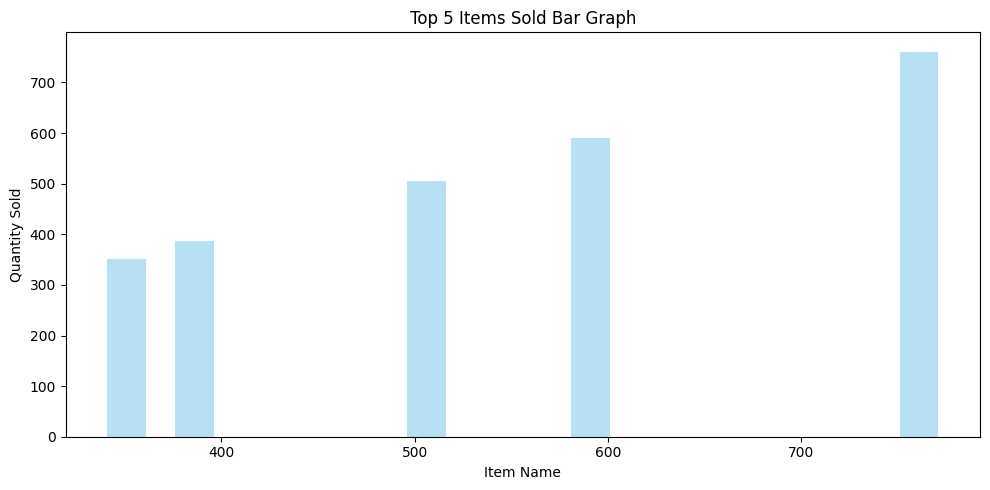

In [30]:
items = chipotle_data.groupby('item_name')['quantity'].sum()
fiveHighestItems = items.sort_values(ascending=False)
fiveHighest = fiveHighestItems.head()
print(fiveHighest)
name = fiveHighest.to_numpy()
quantity = fiveHighest.to_numpy()

#y-axis quantity
#x-axis item_name
plt.figure(figsize = (10, 5))
#plt.bar(fiveHighest['item_name'], fiveHighest['max_quantity'], color='blue', width = 0.4)
plt.bar(name, quantity, color='skyblue', width = 20, alpha = 0.6)

plt.title("Top 5 Items Sold Bar Graph")
plt.xlabel("Item Name")
plt.ylabel("Quantity Sold")
plt.tight_layout()

plt.show()
